# Fourier transform 
$$ 
F(f) = \int_{-\infty}^{\infty} f(\tau)e^{-2\pi f j \tau} d\tau
$$

In [1]:
from Fourier_transform import *
%matplotlib inline
Fs = 2.**15
N = 2.**20

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Sine function
$$
\mbox{Signal: }\sin{(2\pi f_0 t)} = \frac{e^{2\pi f_0 j t} - e^{-2\pi f_0 j t}}{2j} \\
\\
\begin{align*}
\mbox{Fourier Transform: } F(f) &= \int_{-\infty}^{\infty} \frac{e^{2\pi f_0 j \tau} - e^{-2\pi f_0 j \tau}}{2j} e^{-2\pi f j \tau}d\tau \\
&= \frac{-j}{2} \int_{-\infty}^{\infty} e^{-2\pi j \tau (f-f_0)} - e^{-2\pi j \tau (f+f_0)} \\
&= \frac{j}{2} \Big(\delta(f+f_0) - \delta(f-f_0)\Big)
\end{align*}
$$

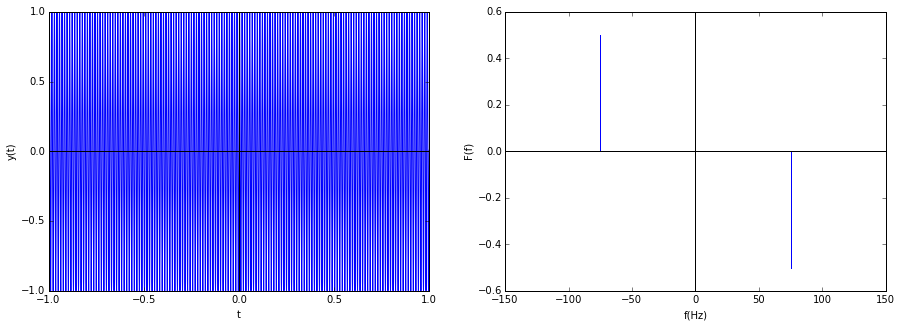

In [2]:
# Defining sine and Fourier transform.
def sine(f):
    t = np.linspace(-N/(2*Fs),N/(2*Fs),N)
    y = np.sin(2*np.pi *f*t)
    draw(t,y,[-2*f,-f,-f,-f,f,f,f,2*f],[0,0,.5,0,0,-.5,0,0],t_lim= (-1,1),yw_lim=(-.6,.6))
   
interact(sine,f=(1,100))

## Cosine function
$$
\mbox{Signal: }\cos{(2\pi f_0 t)} = \frac{e^{2\pi f_0 j t} + e^{-2\pi f_0 j t}}{2} \\
\\
\begin{align*}
\mbox{Fourier Transform: } F(f) &= \int_{-\infty}^{\infty} \frac{e^{2\pi f_0 j \tau} + e^{-2\pi f_0 j \tau}}{2} e^{-2\pi f j \tau}d\tau \\
&= \frac{1}{2} \int_{-\infty}^{\infty} e^{-2\pi j \tau (f-f_0)} + e^{-2\pi j \tau (f+f_0)} \\
&= \frac{1}{2} \Big(\delta(f+f_0) + \delta(f-f_0)\Big)
\end{align*}
$$

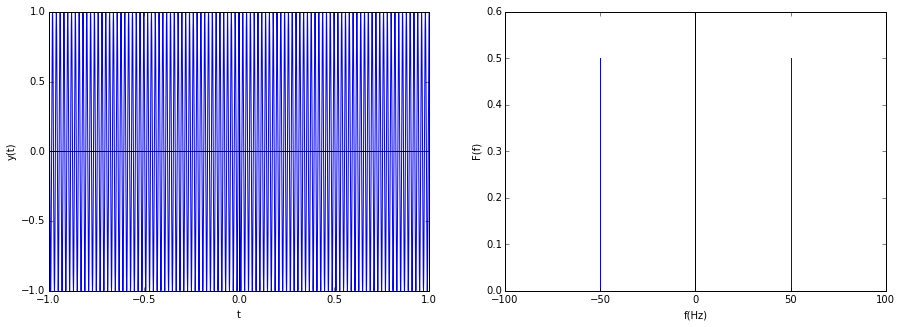

<function __main__.cosine>

In [3]:
def cosine(f):
    t = np.linspace(-N/(2*Fs),N/(2*Fs),N)
    y = np.cos(2*np.pi *f*t)
    draw(t,y,[-2*f,-f,-f,-f,f,f,f,2*f],[0,0,.5,0,0,.5,0,0],t_lim = (-1,1),yw_lim=(0,.6))

interact(cosine,f=(1,100))

## Impulse
$$
\mbox{Signal: }\delta(t-t_0) \\
\mbox{Fourier Transform: } F(f) = e^{-2\pi j f t_0}
$$

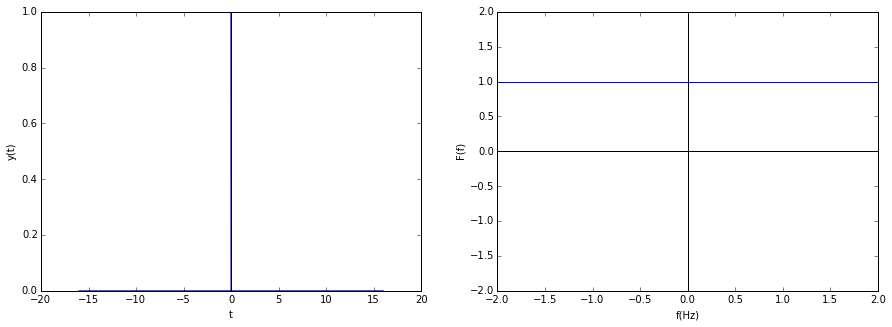

In [4]:
def impulse(t_0):
    t = np.linspace(-N/(2.*Fs),N/(2.*Fs),N)
    y = np.zeros(len(t)) 
    y[len(t)/2 + t_0*Fs ] = 1
    f = np.linspace(-Fs/2.,Fs/2.,N)
    y_w = np.exp(-2*np.pi*t_0*f*1j)
    draw(t,y,f,y_w,f_lim = [-2,2],yw_lim = [-2,2])
interact(impulse,t_0 = (0,N/(2.*Fs)-1,1))

## Impulse train
$$
\mbox{Signal: } \sum\limits_{k\in \mathbb Z} \delta(t-kT)\\
\mbox{Fourier Transform: } F(f) = \frac{1}{T} \sum\limits_{l \in \mathbb Z} \delta(f-\frac{l}{T})
$$

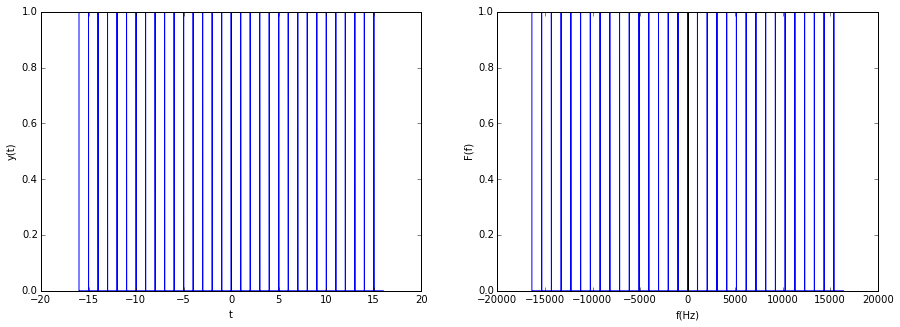

In [9]:
def impulse_train(period):
    t = np.linspace(-N/(2*Fs),N/(2*Fs),N)
    y = np.zeros(len(t))
    i = 0
    while i < len(t):
        y[i] = 1
        i += period*Fs
    f_0 = 1/period
    w = np.linspace(-Fs/(2),Fs/(2),N)
    y_w = np.zeros(len(w))
    k = 0
    while k < len(w):
        y_w[k] = 1./period
        k += f_0*Fs
    draw(t,y,w,y_w)

interact(impulse_train,period = (1.,10.,1.))

## Block
$$
\mbox{Signal: } f(t) = A \Pi(t/\Delta) =
\begin{cases} 
0 &\mbox{if } |t|> \frac{\Delta}{2} \\ 
A &\mbox{if } |t|< \frac{\Delta}{2} 
\end{cases}\\
\mbox{Fourier Transform: } F(f) =\int\limits_{-\infty}^{\infty} A \Pi(t/\Delta) e^{-2\pi f t j} = A \int\limits_{-\Delta/2}^{\Delta/2} 1 e^{-2\pi f t j} = \frac{A sin(\pi f \Delta)}{\pi f}
$$

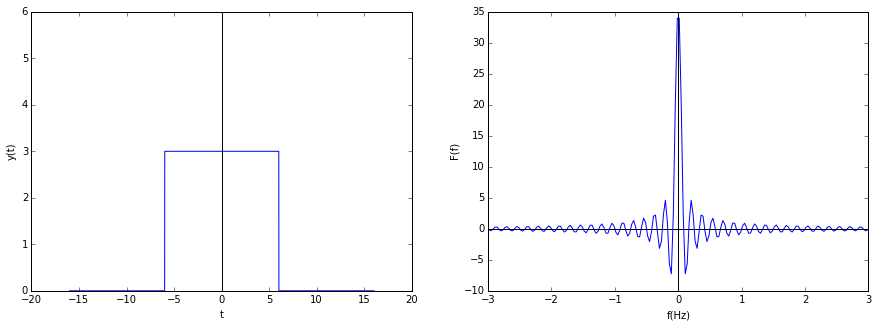

In [14]:
y_w = None
f = None
def block(amp,width):
    global y_w,f
    t = np.linspace(-N/(2*Fs),N/(2*Fs),N)
    y = np.zeros(len(t))
    start = int(len(t)/2-(width/2.0)*Fs)
    stop =  int(len(t)/2 + (width/2.0)*Fs)
    y[start:stop] = amp
    f = np.linspace(-Fs/(2),Fs/(2),N)
    y_w = amp*np.sin(np.pi*f*width)/(np.pi*f)
    draw(t,y,f,y_w,y_lim=[0,6],f_lim=[-3,3])
    
interact(block,amp=(1,5),width = (1,30))

### Low pass filter
Apply a low pass filter to the signal and cut of the high frequencies. We see that the original signal is replaced by a serie of cosines and sines. At the edge of the block, we see the Gibbs phenomenon.

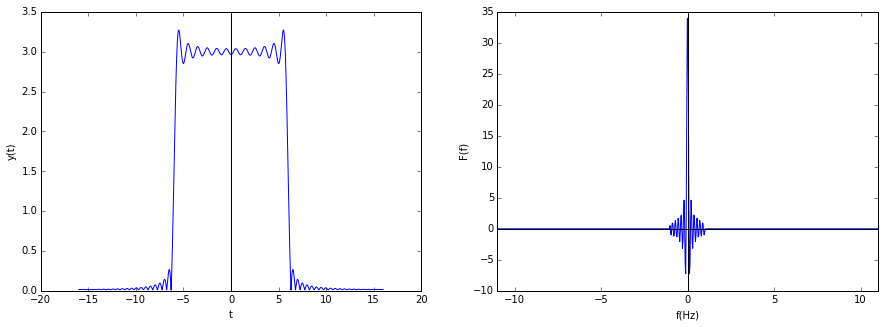

In [17]:
def low_pass(cut_off_frequency):
    pos_pos = np.amin(np.where(f > cut_off_frequency))
    pos_neg = np.amax(np.where(f < -cut_off_frequency))
    temp = y_w[pos_neg:pos_pos]
    diff = len(f) - len(temp)
    y_w_lp = [0] * (diff/2) + temp.tolist() + [0]*(diff/2)
    if diff%2 == 1:
        y_w_lp += [0]
    y_w_lp = np.array(y_w_lp)
    y_signal = fourier.ifftshift(abs(fourier.ifft(Fs*y_w_lp)))
    t_signal = np.linspace(-N/(2.*Fs),N/(2.*Fs),N)
    draw(t_signal,y_signal,f,y_w_lp,f_lim=[-11,11])

interact(low_pass,cut_off_frequency=(1,10))